In [ ]:
import nibabel as nib
import numpy as np
import os
from natsort import natsorted
from glob import glob

def find_tumor_slices(mask_path):
    # Load the mask (.nii or .nii.gz)
    mask_img = nib.load(mask_path)
    mask_data = mask_img.get_fdata()

    # Get the number of slices
    num_slices = mask_data.shape[2]

    start_slice, end_slice = -1, -1

    # Iterate through slices to find non-zero pixels (tumor regions)
    for i in range(num_slices):
        slice_data = mask_data[:, :, i]
        if np.any(slice_data > 0):  # Check if there is a tumor in this slice
            if start_slice == -1:
                start_slice = i  # First non-zero slice
            end_slice = i  # Keep updating to find the last non-zero slice

    return start_slice, end_slice

# Example usage
dataset_path = r"G:\BraTS\MICCAI_BraTS2020_TrainingData"
saving_path = r"G:\Sliced"
mask_path_list = natsorted(glob(os.path.join(dataset_path, "*/*seg.nii")))  # Adjust the path as needed
print(len(mask_path_list))

for folder in os.listdir(dataset_path):
    mask_path = os.path.join(dataset_path,folder, folder+"_seg.nii")  # Adjust the path as needed
    print(mask_path)
    if os.path.exists(mask_path):
        start, end = find_tumor_slices(mask_path)
        print(f"Folder: {folder} -> Tumor Slices: {start} to {end}")


In [2]:
# import nibabel as nib
# import numpy as np
# import os
# from natsort import natsorted
# from glob import glob
# import pandas as pd
# import shutil

# Sub_list ,start_list , end_list , start_end_pair= [] , [] , [] , []

# def find_tumor_slices(mask_path):
#     # Load the mask (.nii or .nii.gz)
#     mask_img = nib.load(mask_path)
#     mask_data = mask_img.get_fdata()

#     # Get the number of slices
#     num_slices = mask_data.shape[2]

#     start_slice, end_slice = -1, -1

#     # Iterate through slices to find non-zero pixels (tumor regions)
#     for i in range(num_slices):
#         slice_data = mask_data[:, :, i]
#         if np.any(slice_data > 0):  # Check if there is a tumor in this slice
#             if start_slice == -1:
#                 start_slice = i  # First non-zero slice
#             end_slice = i  # Keep updating to find the last non-zero slice

#     Sub = end_slice - start_slice
#     Sub_list.append(Sub)
#     start_list.append(start_slice)
#     end_list.append(end_slice)
    
#     start_end_pair.append([start_slice,end_slice])
    
#     return start_slice, end_slice ,Sub , mask_path

# # Example usage
# dataset_path = r"G:\BraTS\MICCAI_BraTS2020_TrainingData"
# mask_path_list = natsorted(glob(os.path.join(dataset_path, "*/*seg.nii")))  # Get all the mask paths
# print(f"Total masks found: {len(mask_path_list)}")


# Prepare a list to store the results
# results = []
# path_LSEQ50 ,path_LSEQ60 ,path_LSEQ80= [],  [],  []


# destination_dir = r"G:\Sliced"

# # Process each mask file
# for mask_path in mask_path_list:
#     # Extract the folder and filename info from mask_path
#     folder = os.path.basename(os.path.dirname(mask_path))
    
#     # Find tumor slices
#     if os.path.exists(mask_path):
#         start, end , Sub ,path = find_tumor_slices(mask_path)
#         # print(f"Folder: {folder} -> Tumor Slices: {start} to {end}")
        
#         # Store the result in the results list
#         results.append([folder, start, end,Sub])
        
#         if Sub >= 20 and Sub <= 58 :
#             path_LSEQ50.append(path)
#         elif Sub > 58 and Sub <= 74:
#             path_LSEQ60.append(path)
#         elif Sub > 74 and Sub <= 120:
#             path_LSEQ80.append(path)
        
        


# pre_folder_name = ["Training_GT20LSEQ58", "Training_GT58LSEQ74", "Training_GT74LSEQ120"]

# def copy_folders(path_list, destination_dir, i):
#     # Create the main folder in destination if it doesn't exist
#     destination_split_dir = os.path.join(destination_dir, pre_folder_name[i])
#     os.makedirs(destination_split_dir, exist_ok=True)

#     # Iterate over the path list to copy individual folders
#     for path in path_list:
#         # Ensure path is the directory containing the file, not the file itself
#         folder_name = os.path.basename(os.path.dirname(path))  # Get the parent folder name
#         new_folder_path = os.path.join(destination_split_dir, folder_name)

#         # If the folder doesn't exist in the destination, copy it
#         if not os.path.exists(new_folder_path):
#             shutil.copytree(os.path.dirname(path), new_folder_path)  # Copy the parent directory of the file
#             print(f"Copied {folder_name} to {new_folder_path}")
#         else:
#             print(f"{folder_name} already exists in the destination. Skipping.")

# # Example of calling the function
# destination_dir = r"G:/Sliced/"# Replace with your actual destination path

# # Copy each split group
# copy_folders(path_LSEQ50, destination_dir, i=0)
# copy_folders(path_LSEQ60, destination_dir, i=1)
# copy_folders(path_LSEQ80, destination_dir, i=2)




In [3]:
# import matplotlib.pyplot as plt

# # Example Sub values (difference between end_slice and start_slice)

# plt.figure(figsize=(44, 15))
# plt.hist(Sub_list, bins=range(20,120), edgecolor='black')  # You can adjust the number of bins
# plt.title("Histogram of Slice Lengths")
# plt.xlabel("Slice Length (Sub)")
# plt.ylabel("Number of Training Folders")
# plt.xticks(range(21, 105, 1)) 
# plt.show()


In [4]:


# import nibabel as nib
# import numpy as np
# import os
# from natsort import natsorted
# from glob import glob

# Sub_list ,start_list , end_list , start_end_pair= [] , [] , [] , []

# def find_tumor_slices(mask_path):
#     # Load the mask (.nii or .nii.gz)
#     mask_img = nib.load(mask_path)
#     mask_data = mask_img.get_fdata()

#     # Get the number of slices
#     num_slices = mask_data.shape[2]

#     start_slice, end_slice = -1, -1

#     # Iterate through slices to find non-zero pixels (tumor regions)
#     for i in range(num_slices):
#         slice_data = mask_data[:, :, i]
#         if np.any(slice_data > 0):  # Check if there is a tumor in this slice
#             if start_slice == -1:
#                 start_slice = i  # First non-zero slice
#             end_slice = i  # Keep updating to find the last non-zero slice

#     Sub = end_slice - start_slice
#     Sub_list.append(Sub)
#     start_list.append(start_slice)
#     end_list.append(end_slice)
    
#     start_end_pair.append([start_slice,end_slice])
    
#     return start_slice, end_slice ,Sub , mask_path

# # Example usage
# dataset_path =  r"G:\BraTS\MICCAI_BraTS2020_TrainingData"

# mask_path_list = natsorted(glob(os.path.join(dataset_path, "*/*seg.nii")))  # Adjust the path as needed
# print(len(mask_path_list))

# for folder in os.listdir(dataset_path):
#     mask_path = os.path.join(dataset_path,folder, folder+"_seg.nii")  # Adjust the path as needed
#     if os.path.exists(mask_path):
#         start, end , Sub , mask_path = find_tumor_slices(mask_path)
#         print(f"Folder: {folder} -> Tumor Slices: {start} to {end}")


In [5]:


import nibabel as nib
import numpy as np
import os
from natsort import natsorted
from glob import glob

Sub_list ,start_list , end_list , start_end_pair= [] , [] , [] , []
sep_start_list , sep_end_list , sep_start_end_pair= [] , [] ,[]

def find_tumor_slices(mask_path):
    # Load the mask (.nii or .nii.gz)
    mask_img = nib.load(mask_path)
    mask_data = mask_img.get_fdata()

    # Get the number of slices
    num_slices = mask_data.shape[2]

    start_slice, end_slice = -1, -1

    # Iterate through slices to find non-zero pixels (tumor regions)
    for i in range(num_slices):
        slice_data = mask_data[:, :, i]
        if np.any(slice_data > 0):  # Check if there is a tumor in this slice
            if start_slice == -1:
                start_slice = i  # First non-zero slice
            end_slice = i  # Keep updating to find the last non-zero slice

    Sub = end_slice - start_slice
    Sub_list.append(Sub)
    sep_end_list.append(end_slice)
    sep_start_list.append(start_slice)
    sep_start_end_pair.append([start_slice,end_slice])
    
    if start_slice>=22 and start_slice<=76 and end_slice>=66 and end_slice<=120:
        
        start_list.append(start_slice)        
        end_list.append(end_slice)
        
        x = start_slice
        y = end_slice
        
        start_end_pair.append([x,y])
    
    
    
    return start_slice, end_slice ,Sub , mask_path

# Example usage
dataset_path =  r"G:\BraTS\MICCAI_BraTS2020_TrainingData"

for folder in os.listdir(dataset_path):
    mask_path = os.path.join(dataset_path,folder, folder+"_seg.nii")  # Adjust the path as needed
    if os.path.exists(mask_path):
        # print(mask_path)
        find_tumor_slices(mask_path)
        

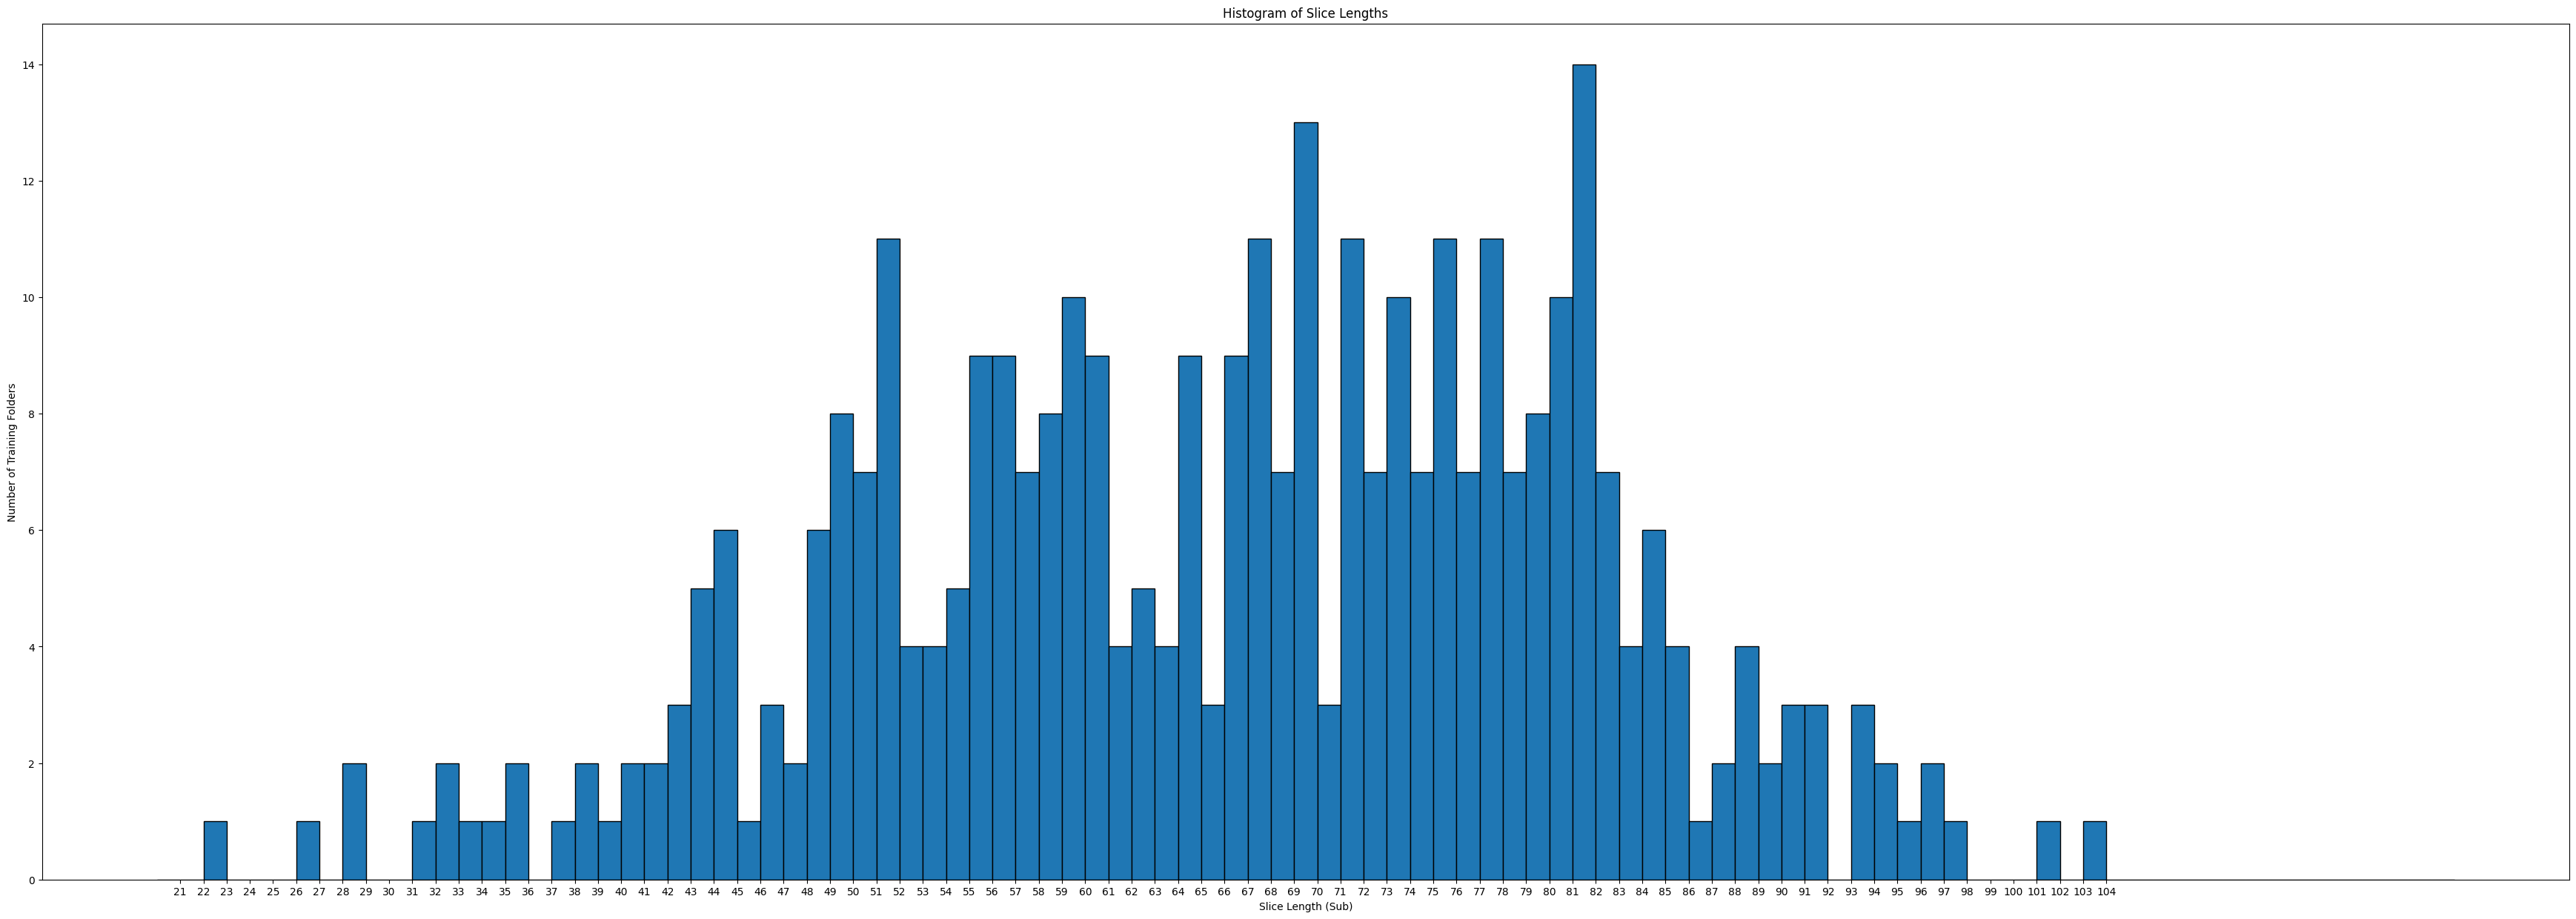

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(44, 15))
plt.hist(Sub_list, bins=range(20,120), edgecolor='black')  # You can adjust the number of bins
plt.title("Histogram of Slice Lengths")
plt.xlabel("Slice Length (Sub)")
plt.ylabel("Number of Training Folders")
plt.xticks(range(21, 105, 1)) 
plt.show()

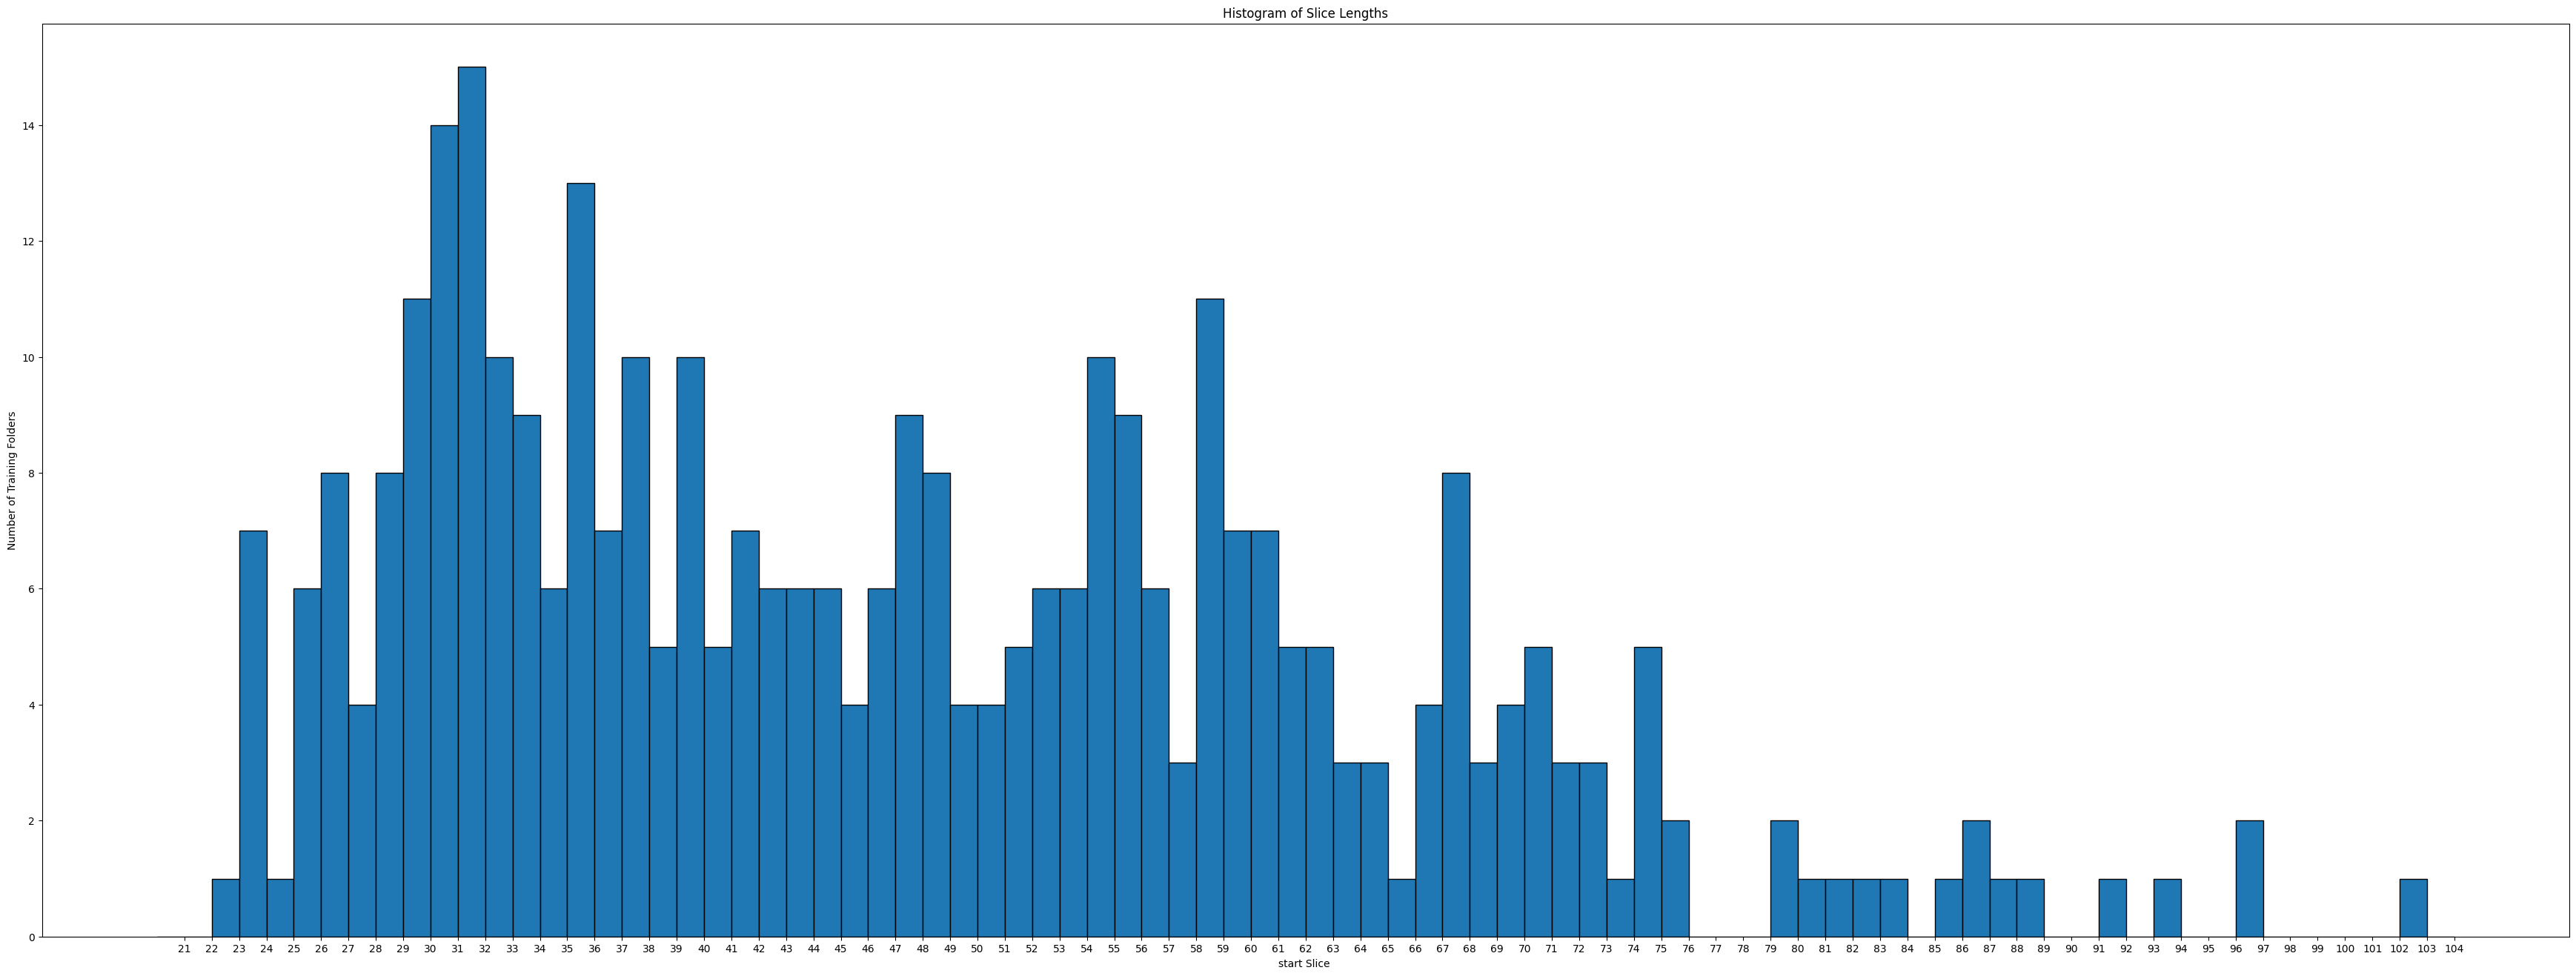

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(44, 16))
plt.hist(sep_start_list, bins=range(20,105), edgecolor='black')  # You can adjust the number of bins
plt.title("Histogram of Slice Lengths")
plt.xlabel("start Slice ")
plt.ylabel("Number of Training Folders")
plt.xticks(range(21, 105, 1)) 
plt.show()

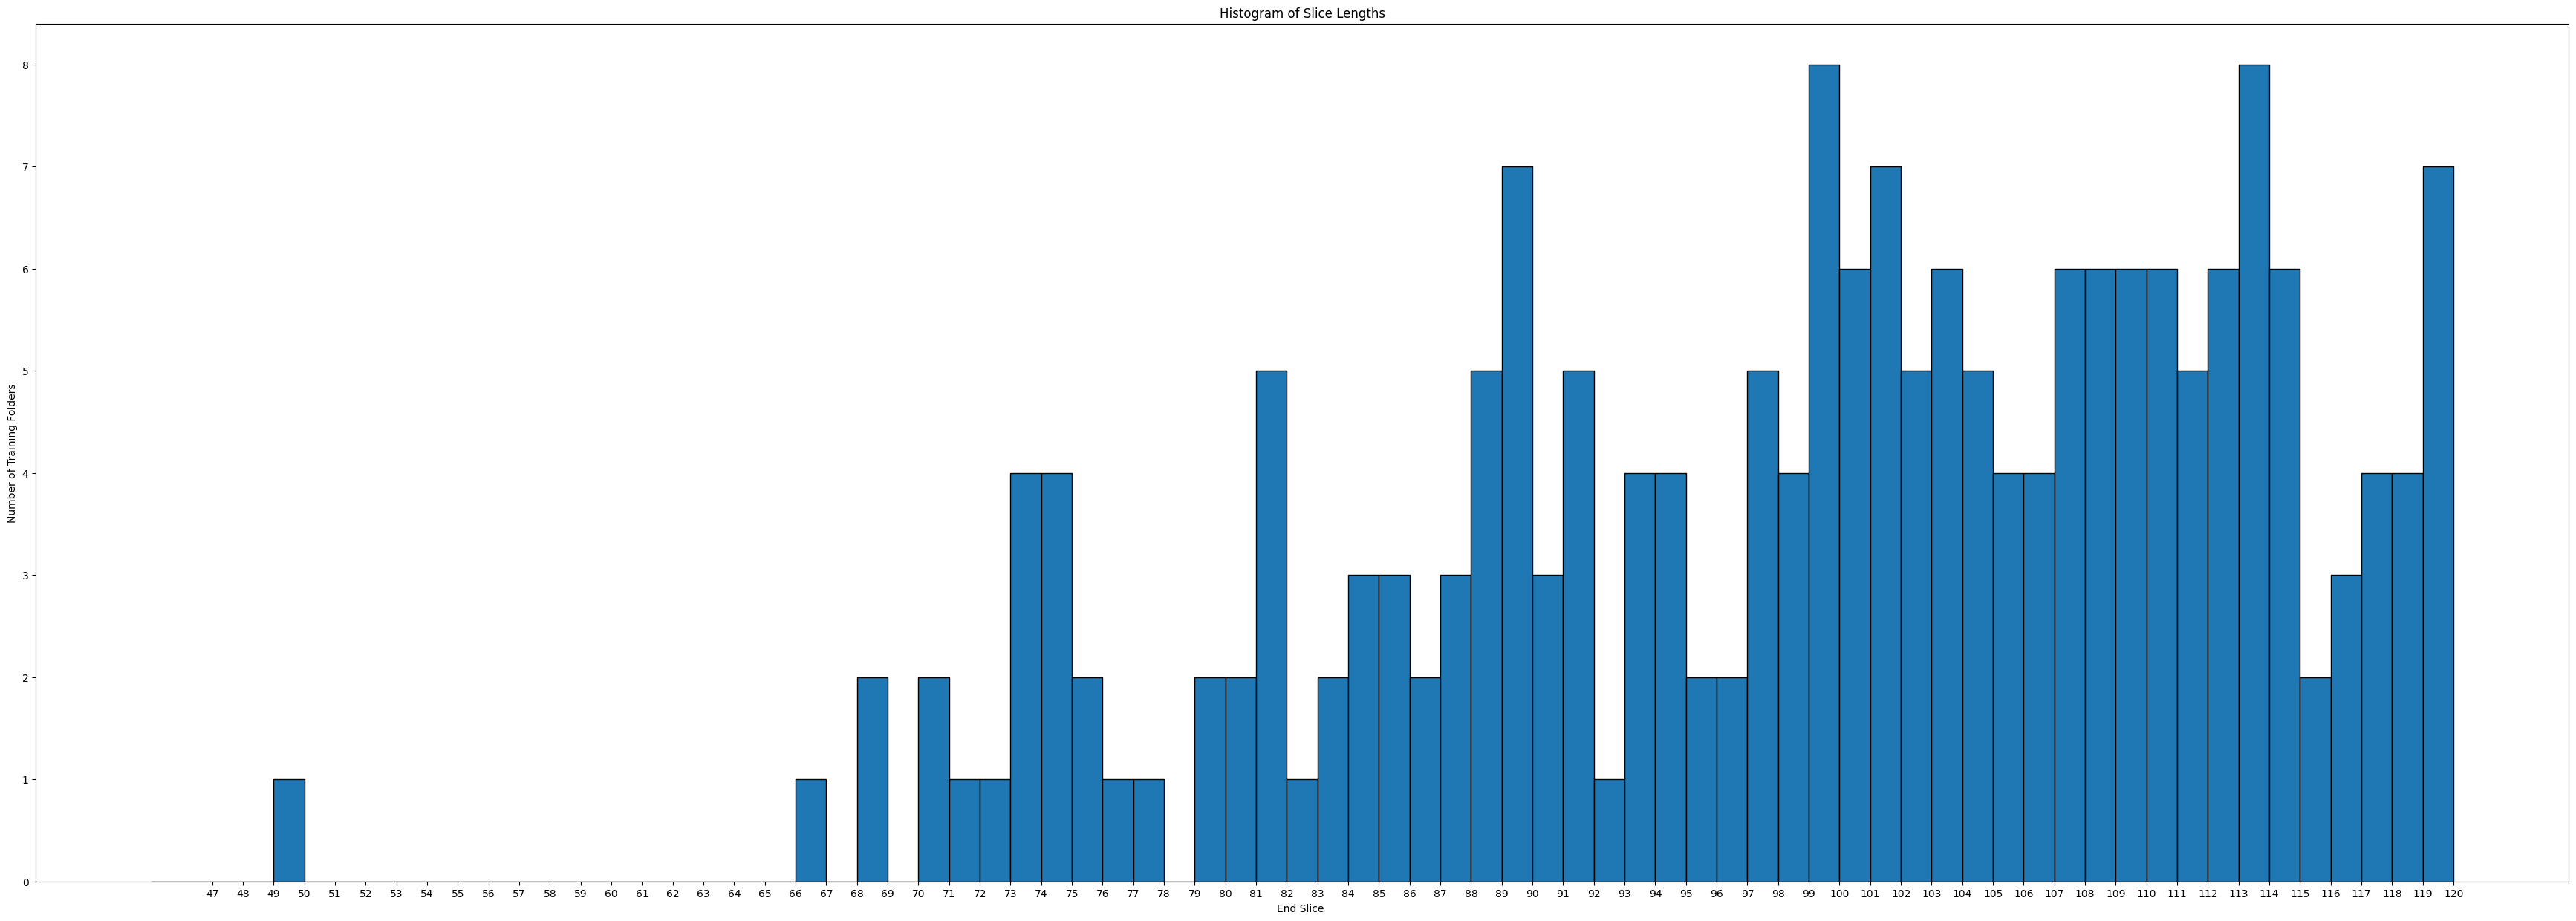

In [9]:

plt.figure(figsize=(44, 15))
plt.hist(sep_end_list, bins=range(45,121), edgecolor='black')  # You can adjust the number of bins
plt.title("Histogram of Slice Lengths")
plt.xlabel("End Slice ")
plt.ylabel("Number of Training Folders")
plt.xticks(range(47, 121, 1)) 
plt.show()

In [10]:
sep_start_end_pair[:5]

[[30, 112], [27, 81], [58, 109], [54, 121], [79, 129]]

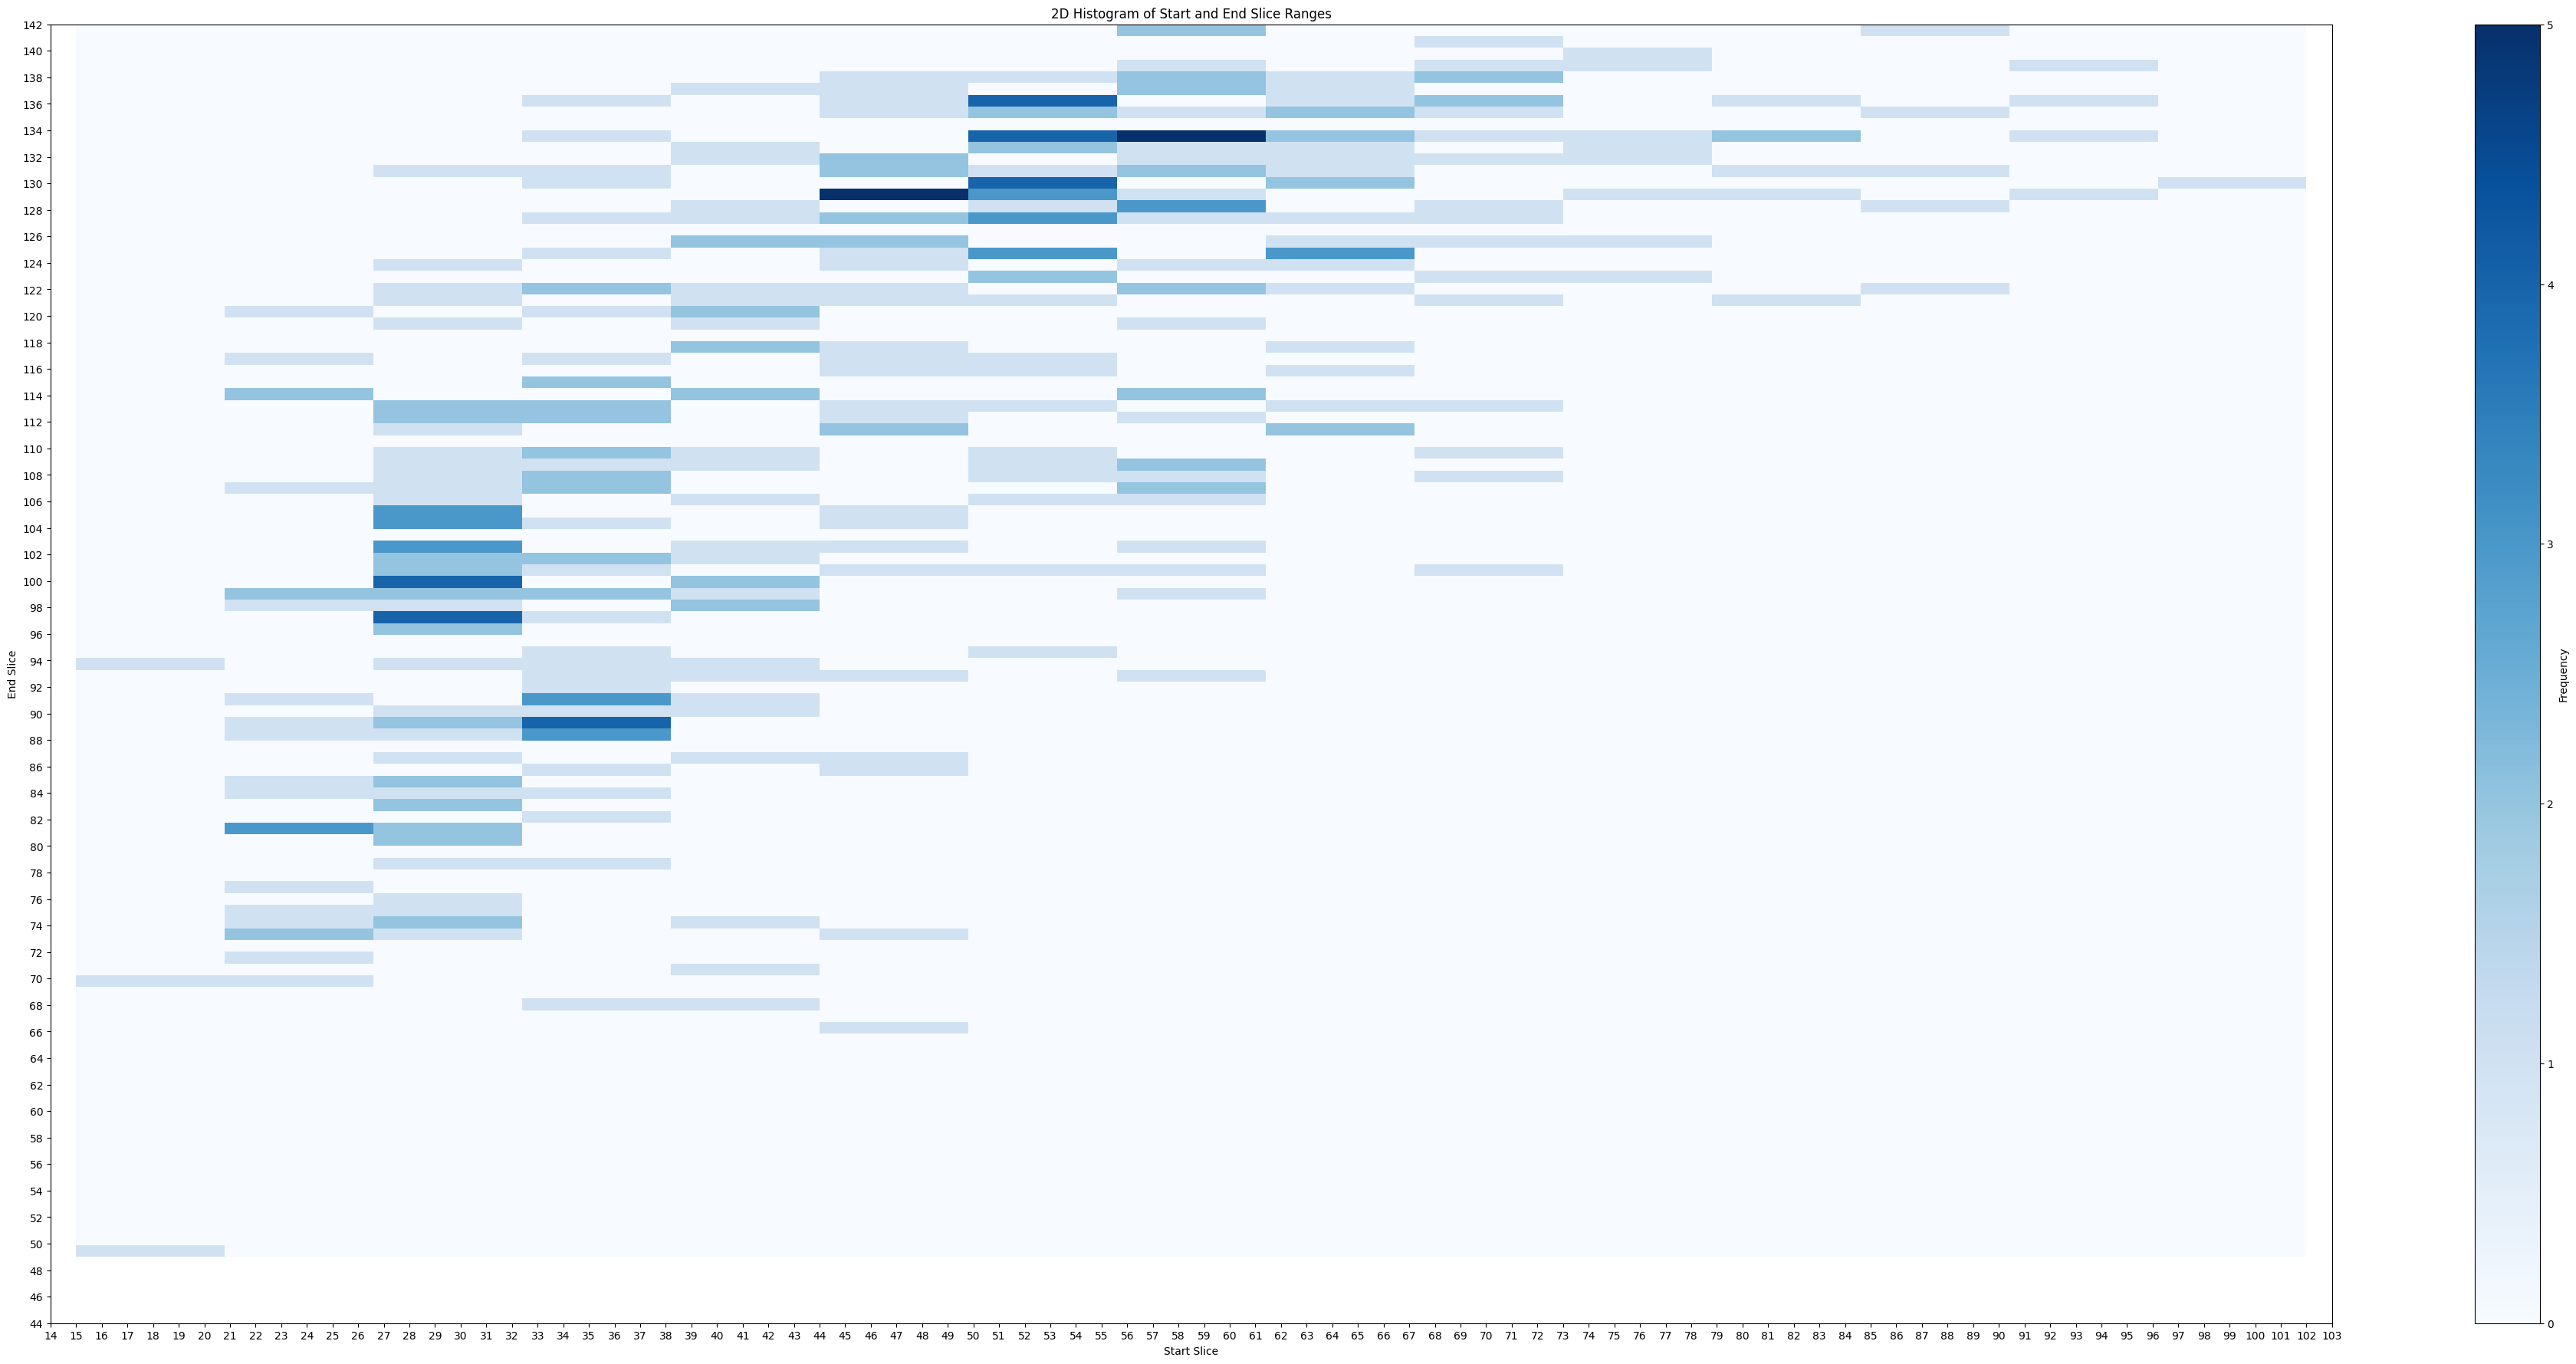

In [11]:
sep_start_end_pair = np.array(sep_start_end_pair)
plt.figure(figsize=(48, 22))
plt.hist2d(sep_start_end_pair[:, 0], sep_start_end_pair[:, 1], bins=[15, 105], cmap='Blues')
plt.colorbar(label='Frequency')
plt.xlabel('Start Slice')
plt.ylabel('End Slice')
plt.xticks(range(14, 104, 1)) 
plt.yticks(range(44, 144, 2)) 
plt.title('2D Histogram of Start and End Slice Ranges')
plt.show()

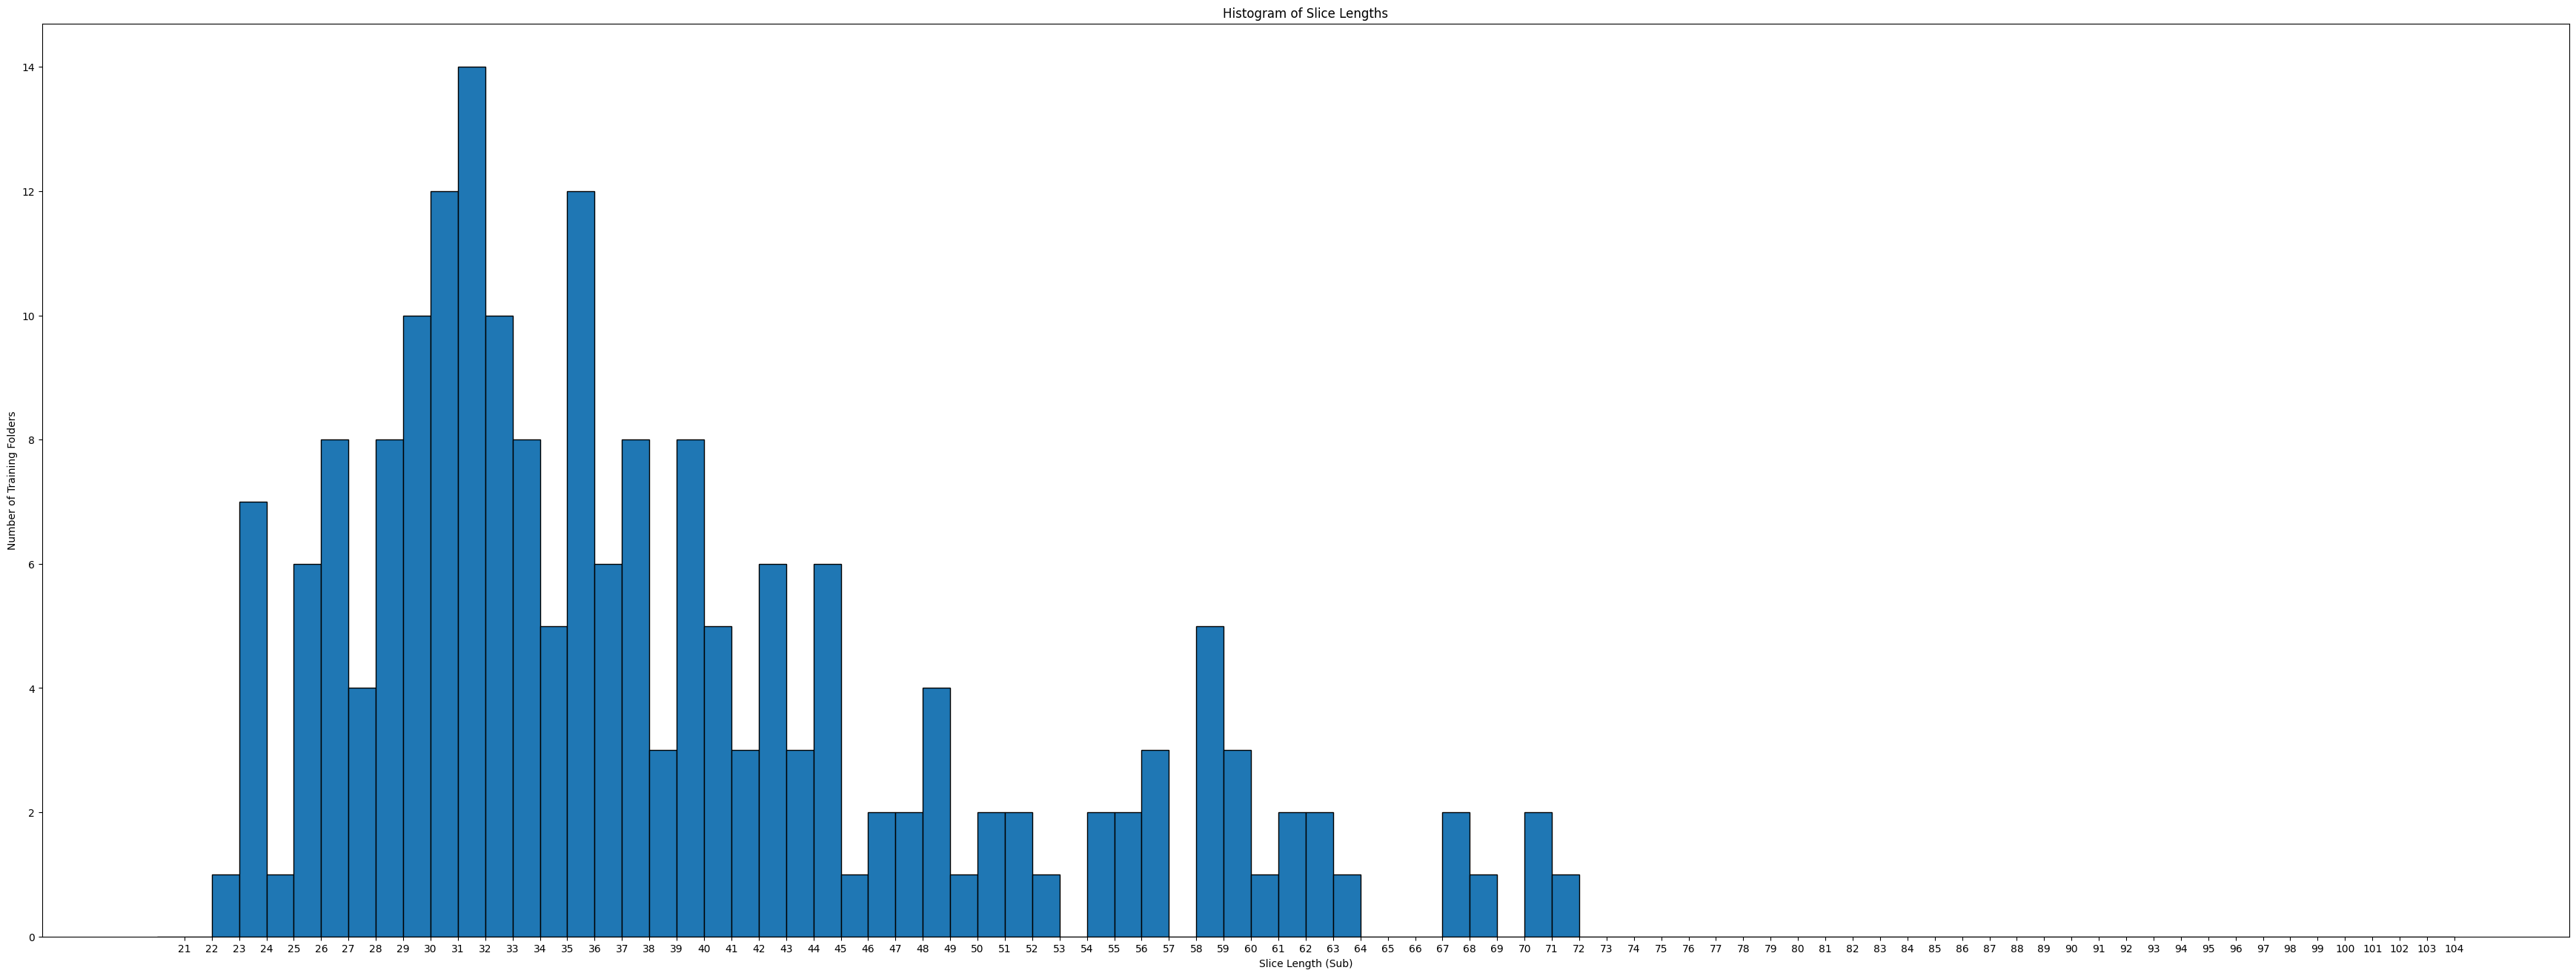

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(44, 16))
plt.hist(start_list, bins=range(20,105), edgecolor='black')  # You can adjust the number of bins , between 22 and 98
plt.title("Histogram of Slice Lengths")
plt.xlabel("Slice Length (Sub)")
plt.ylabel("Number of Training Folders")
plt.xticks(range(21, 105, 1)) 
plt.show()

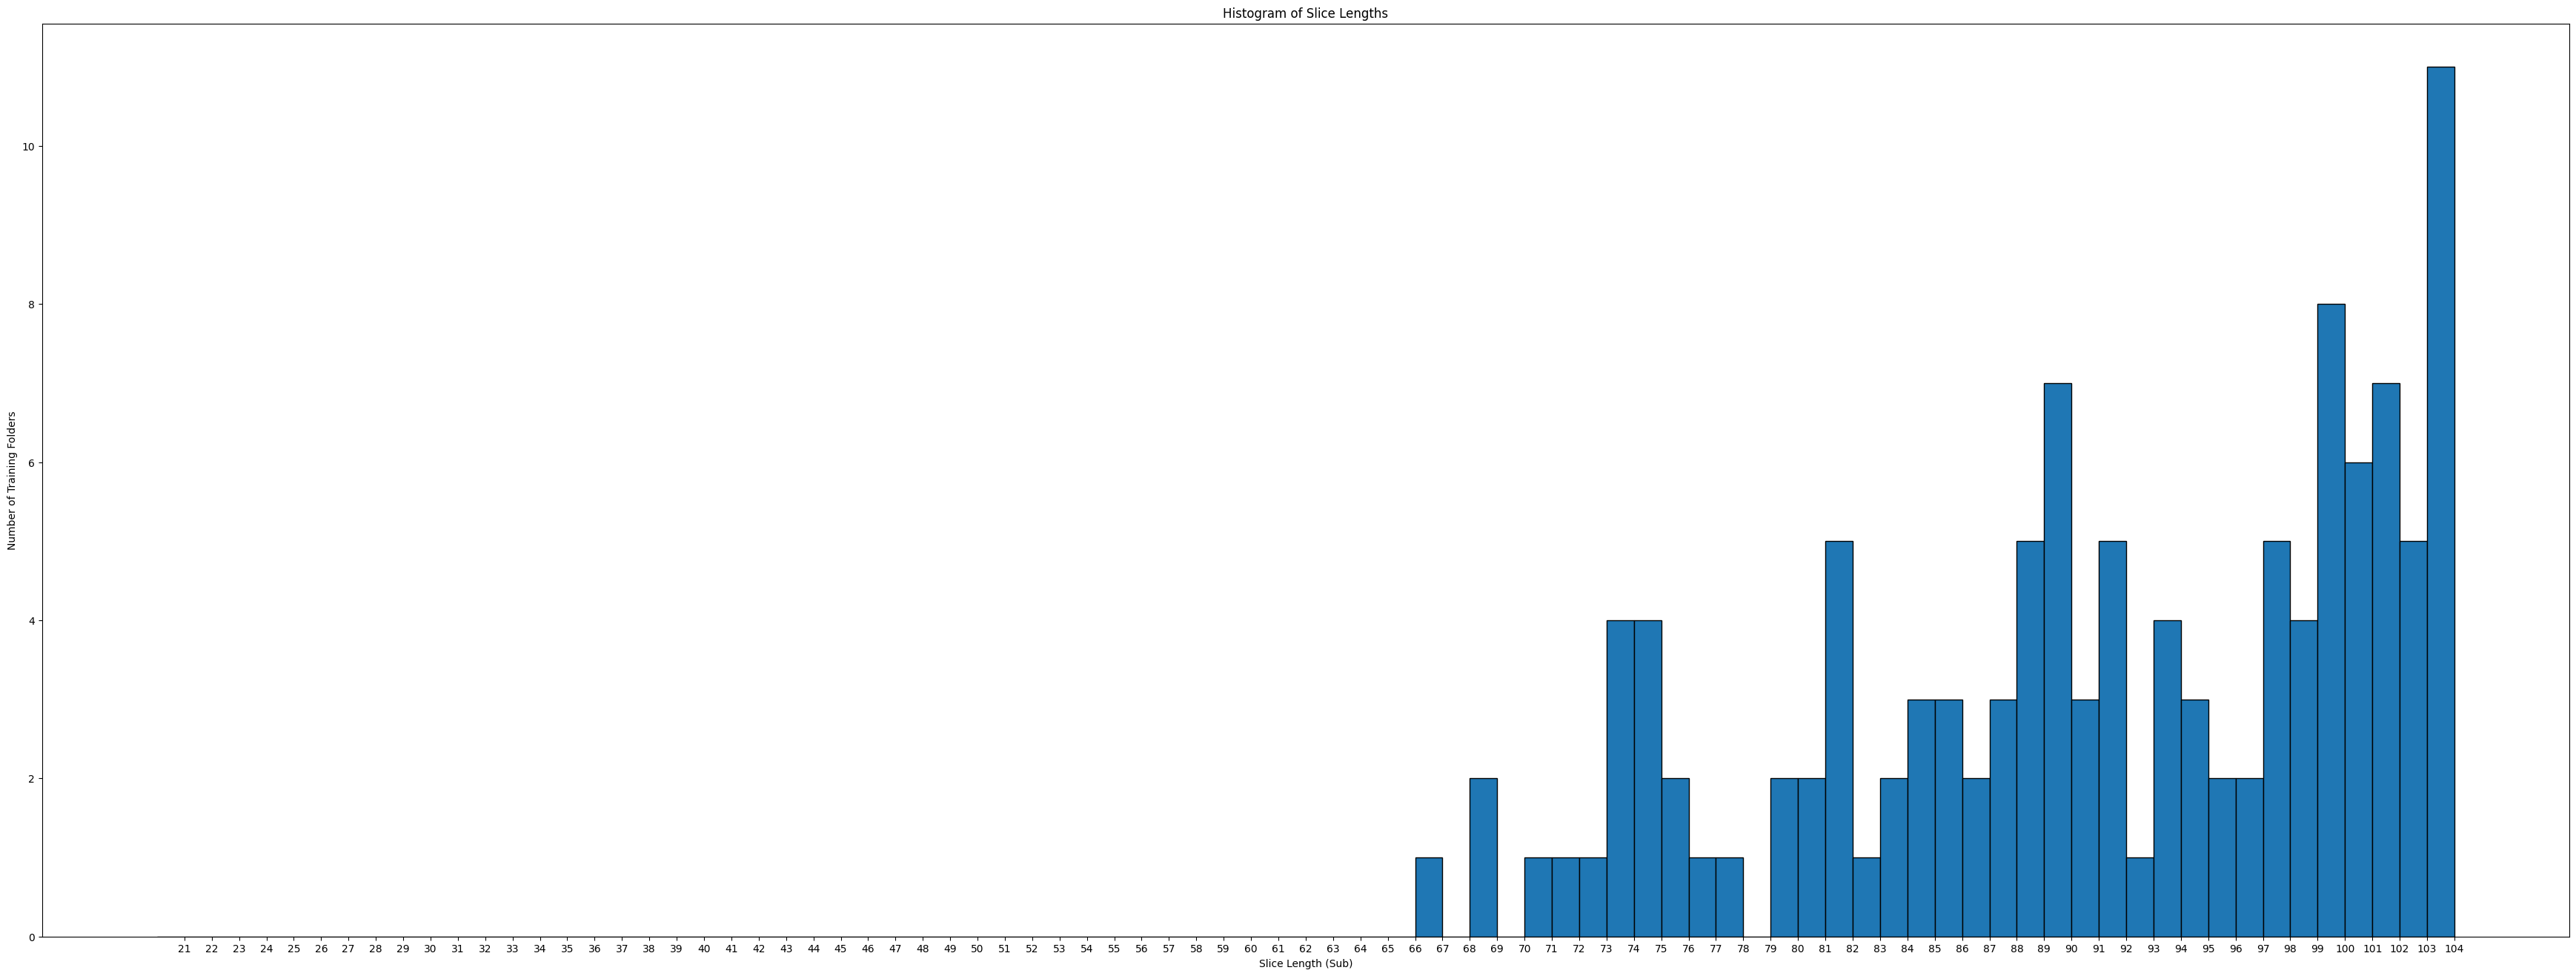

In [13]:

plt.figure(figsize=(44, 16))
plt.hist(end_list, bins=range(20,105), edgecolor='black')  # You can adjust the number of bins , between 66 and 120
plt.title("Histogram of Slice Lengths")
plt.xlabel("Slice Length (Sub)")
plt.ylabel("Number of Training Folders")
plt.xticks(range(21, 105, 1)) 
plt.show()

In [16]:
start_end_pair[:2] , len(start_end_pair)

(array([[ 30, 112],
        [ 27,  81]]),
 196)

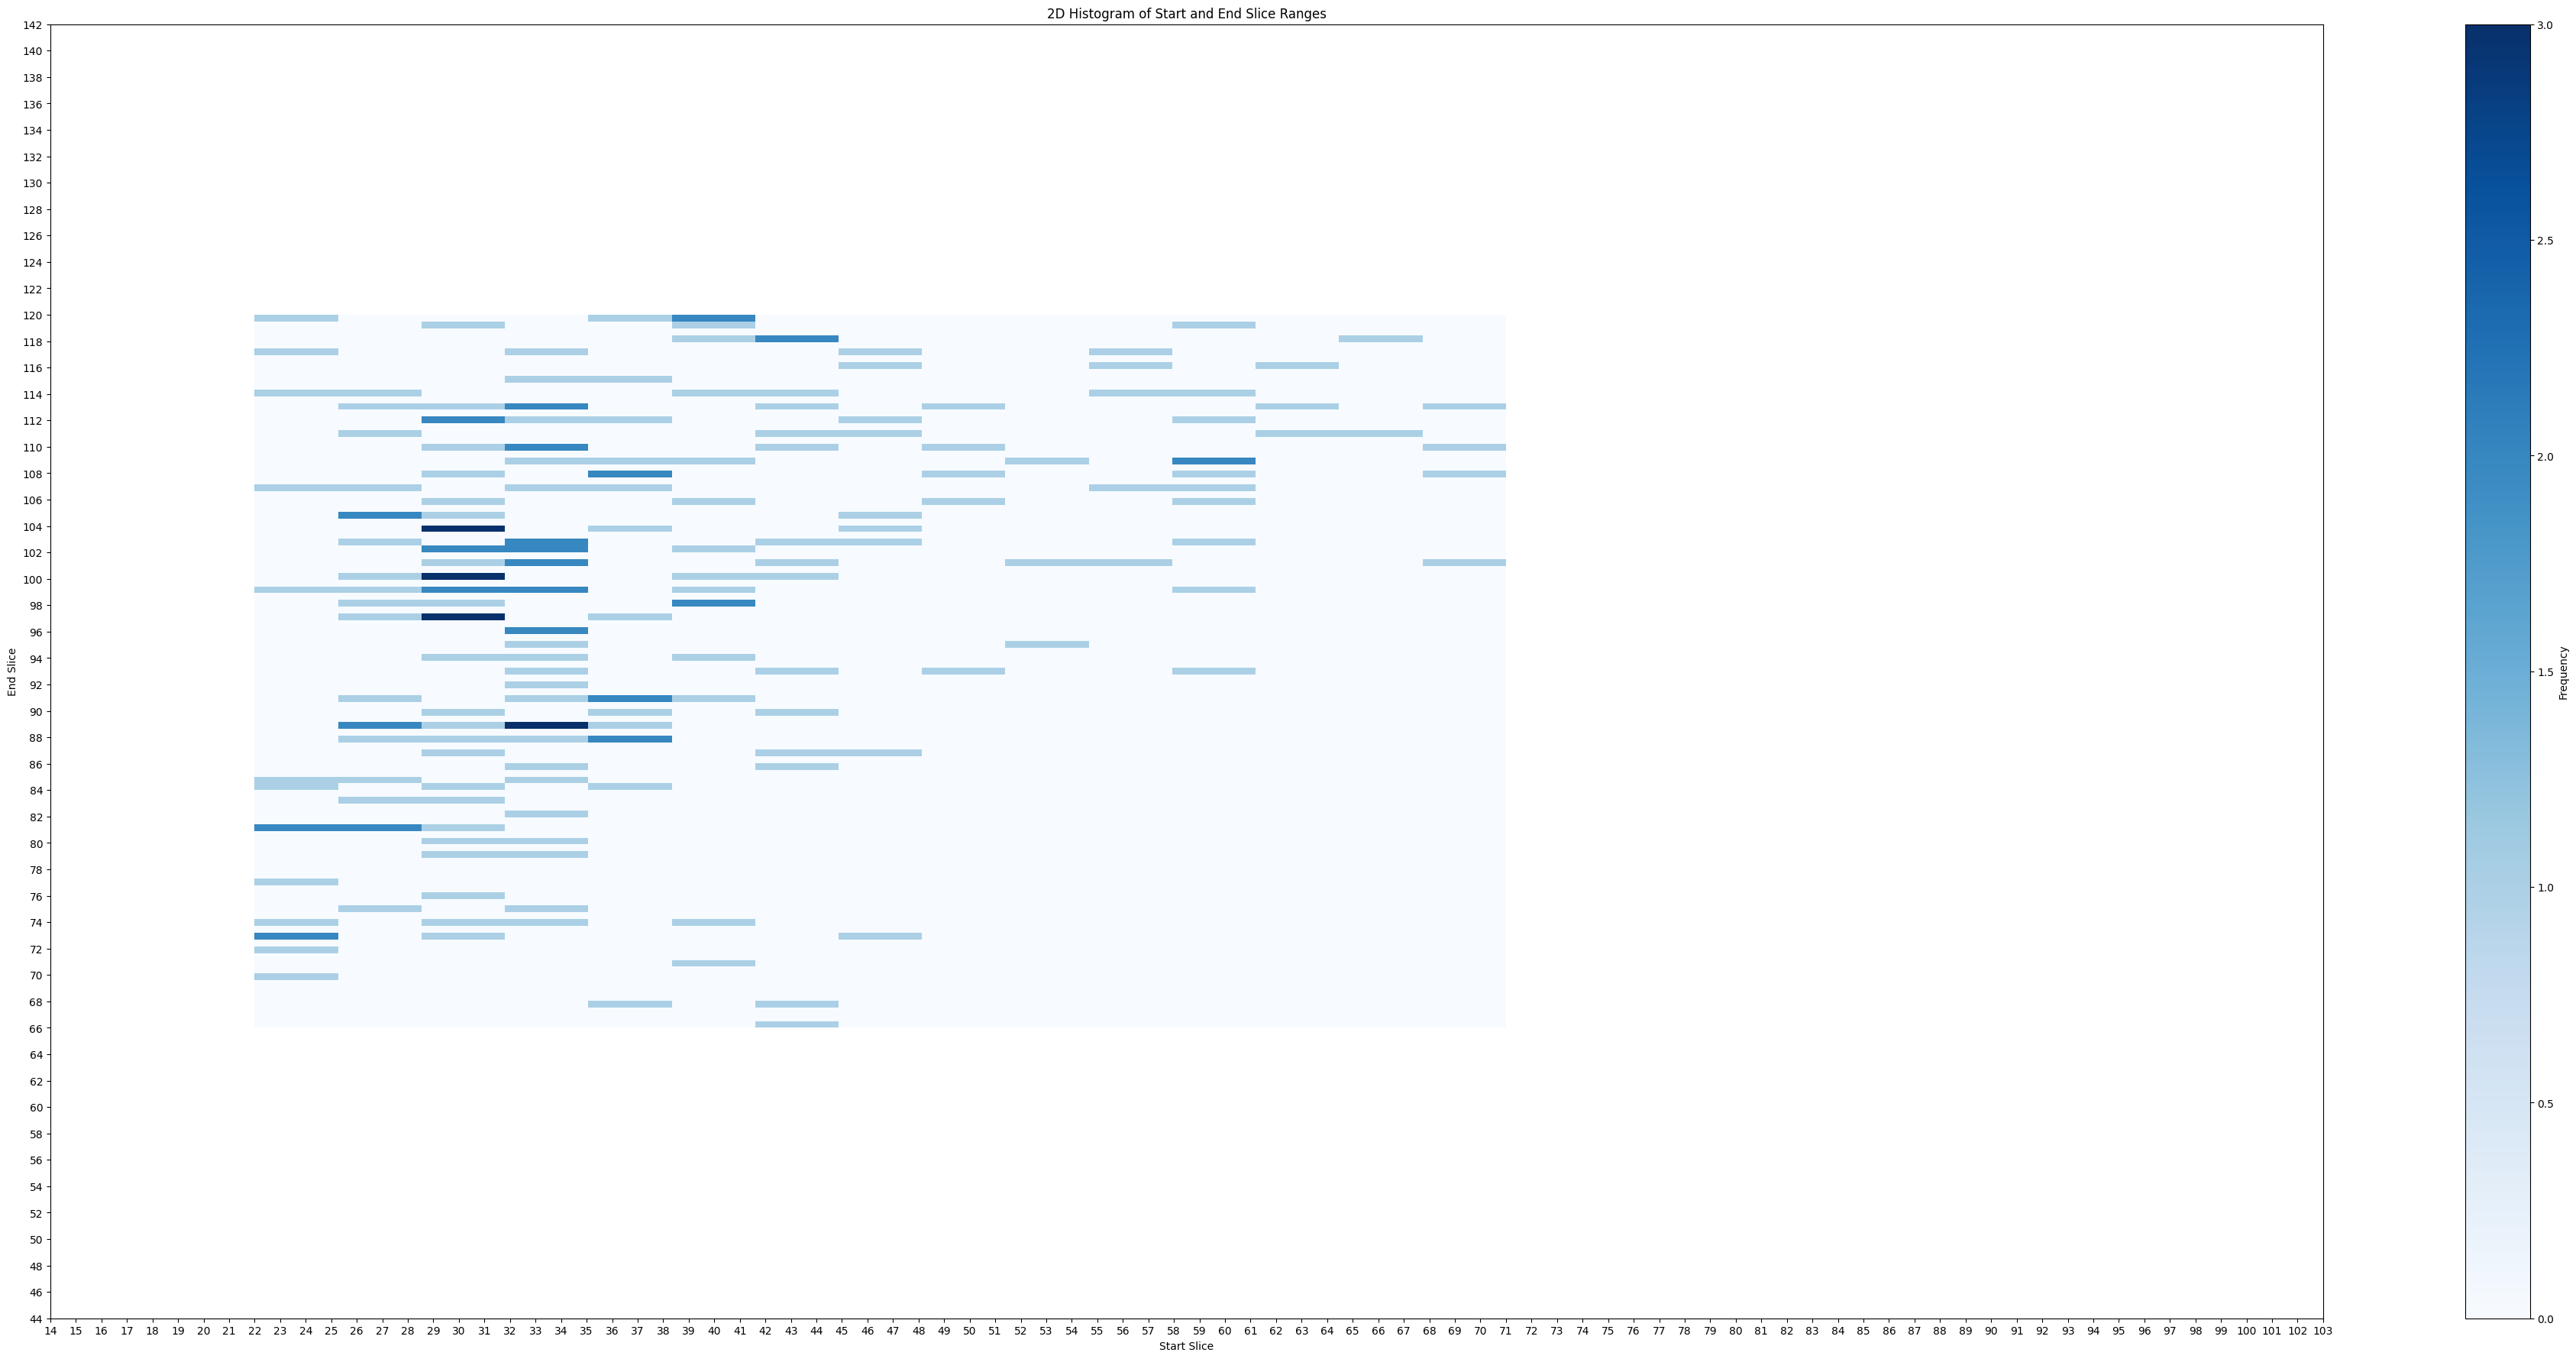

In [14]:
start_end_pair = np.array(start_end_pair)
plt.figure(figsize=(48, 22))
plt.hist2d(start_end_pair[:, 0], start_end_pair[:, 1], bins=[15, 105], cmap='Blues')
plt.colorbar(label='Frequency')
plt.xlabel('Start Slice')
plt.ylabel('End Slice')
plt.xticks(range(14, 104, 1)) 
plt.yticks(range(44, 144, 2)) 
plt.title('2D Histogram of Start and End Slice Ranges')
plt.show()

In [12]:
import nibabel as nib
import numpy as np
import os

def find_tumor_slices(mask_path):
    # Load the mask (.nii or .nii.gz)
    mask_img = nib.load(mask_path)
    mask_data = mask_img.get_fdata()

    # Get the number of slices
    num_slices = mask_data.shape[2]
    start_slice, end_slice = -1, -1

    # Find start and end slice with tumor presence
    for i in range(num_slices):
        slice_data = mask_data[:, :, i]
        if np.any(slice_data > 0):  # Check if there is a tumor in this slice
            if start_slice == -1:
                start_slice = i  # First non-zero slice
            end_slice = i  # Keep updating to find the last non-zero slice

    # Check if a valid tumor range is found
    if start_slice == -1 or end_slice == -1:
        return -1, -1, mask_path, []  # No tumor found

    max_length = 0
    best_pair = []

    # Find the pair with the maximum range length that satisfies the condition
    for i in range(22, 84):
        for j in range(i, 106):  # Ensure j >= i
            for k in range(49, 100):
                for l in range(k, 122):  # Ensure l >= k
                    # Check if the start and end slices are within the range
                    if (i <= start_slice <= j) and (k <= end_slice <= l):
                        range_length = (j - i) + (l - k)  # Calculate combined range length
                        if range_length > max_length:
                            max_length = range_length
                            best_pair = [start_slice, end_slice, i, j, k, l]
                            best_pair = [start_slice, end_slice, len(best_pair), i, j, k, l]

    return start_slice, end_slice, mask_path, best_pair

# Example usage
dataset_path = r"G:\BraTS\MICCAI_BraTS2020_TrainingData"

for folder in os.listdir(dataset_path):
    mask_path = os.path.join(dataset_path, folder, folder + "_seg.nii")  # Adjust the path as needed
    if os.path.exists(mask_path):
        start, end, path, pair = find_tumor_slices(mask_path)
        print(f"Start: {start}, End: {end}, Path: {path}")
        if pair:
            print(f"Largest Valid Pair: {pair}")
        else:
            print("No valid pair found.")


        

Start: 30, End: 112, Path: G:\BraTS\MICCAI_BraTS2020_TrainingData\BraTS20_Training_001\BraTS20_Training_001_seg.nii
Largest Valid Pair: [30, 112, 6, 22, 105, 49, 121]
Start: 27, End: 81, Path: G:\BraTS\MICCAI_BraTS2020_TrainingData\BraTS20_Training_002\BraTS20_Training_002_seg.nii
Largest Valid Pair: [27, 81, 6, 22, 105, 49, 121]
Start: 58, End: 109, Path: G:\BraTS\MICCAI_BraTS2020_TrainingData\BraTS20_Training_003\BraTS20_Training_003_seg.nii
Largest Valid Pair: [58, 109, 6, 22, 105, 49, 121]
Start: 54, End: 121, Path: G:\BraTS\MICCAI_BraTS2020_TrainingData\BraTS20_Training_004\BraTS20_Training_004_seg.nii
Largest Valid Pair: [54, 121, 6, 22, 105, 49, 121]
Start: 79, End: 129, Path: G:\BraTS\MICCAI_BraTS2020_TrainingData\BraTS20_Training_005\BraTS20_Training_005_seg.nii
No valid pair found.
Start: 59, End: 134, Path: G:\BraTS\MICCAI_BraTS2020_TrainingData\BraTS20_Training_006\BraTS20_Training_006_seg.nii
No valid pair found.
Start: 35, End: 88, Path: G:\BraTS\MICCAI_BraTS2020_Training

KeyboardInterrupt: 

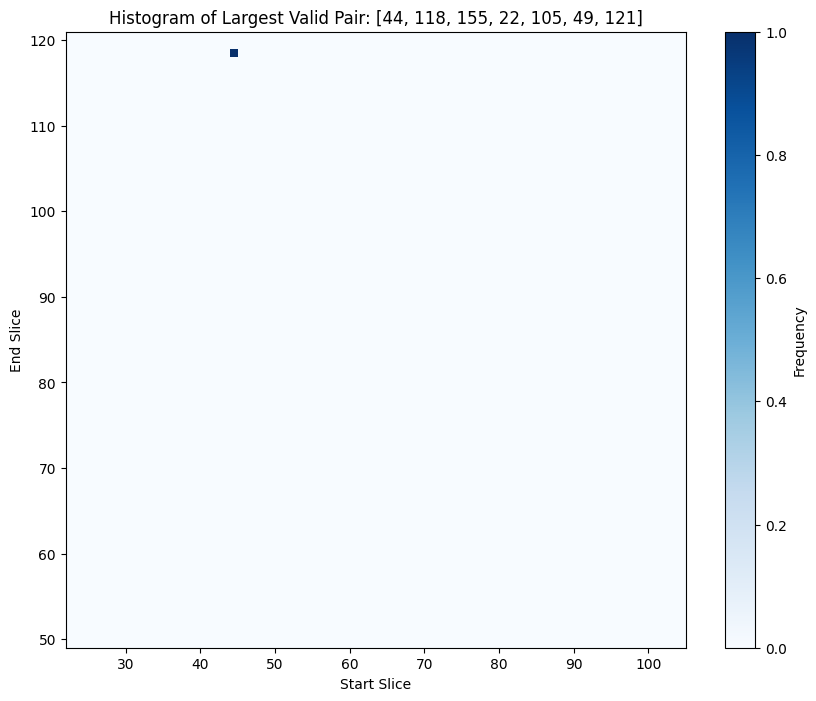

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Largest valid pair values
start_slice, end_slice, max_length, start_min, start_max, end_min, end_max = 44, 118, 155, 22, 105, 49, 121

# Generating bins based on the pair values
x_bins = np.arange(start_min, start_max + 1)
y_bins = np.arange(end_min, end_max + 1)

# Creating a 2D histogram with the pair data
plt.figure(figsize=(10, 8))
plt.hist2d([start_slice], [end_slice], bins=[x_bins, y_bins], cmap='Blues')

# Adding labels and title
plt.colorbar(label='Frequency')
plt.xlabel('Start Slice')
plt.ylabel('End Slice')
plt.title(f'Histogram of Largest Valid Pair: [{start_slice}, {end_slice}, {max_length}, {start_min}, {start_max}, {end_min}, {end_max}]')

# Display the plot
plt.show()


In [ ]:
# for i in range(22, 84):
#     for j in range(44,106):
#         for k in range(49,100):
#             for l in range(71,122):
                
#                if start_slice>=i and start_slice<=j and end_slice>=k and end_slice<=l:
                   
#                    new_start_list.append(start_slice)
#                    new_end_list.append(end_slice)
                   
#                    x = start_slice
#                    y = end_slice
                   
#                     if pair1 not null:
#                         pair2.append([x,y])
#                     else:
#                         pair1.append([x,y])
                        
#                     if len(pair1)>=len(pair2):
                        
#                         pair1.clear()
                        
#                     else:
#                         pair2.clear()
                        
